In [1]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  import os
  !pip install pickle5
  !pip install cython
  !pip install pandas==1.2.2
  CWD = '/content/drive/MyDrive/DataSources/SkinCare_Project'
  G_path = '/content/drive/MyDrive/DataSources/SkinCare_Project/SkinCare_Project/Project_Data'
  os.chdir(CWD)
except:
  G_path = './Project_Data'

In [34]:
import pandas as pd
import os
import seaborn as sns
from sklearn import *
import sklearn as sk
from sklearn import *
import numpy as np
from scipy.stats import chi2_contingency
# import CNN_Nets
from features import *
import datetime as dt
import pickle5 as pickle
import torch
import json
import random
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from statistics import mean
import warnings
warnings.filterwarnings('ignore')

# **Import Data for Classifiers**

In [35]:
os.listdir(G_path)

['04_Rescaled_Images',
 '03_AutoEncoded_Images',
 '00_HAM1000_DataSet',
 '01_Augmented_Imaged',
 '05_AutoEncoded_DataSet',
 '06_Rescaled_DataSet',
 '02_Augmented_MetaData',
 '07_CNNs_Output_DataSet',
 '08_Saved_Models_Outpus']

In [50]:
obj = pd.read_pickle(G_path + '/02_Augmented_MetaData/balanced_test_set',compression=None)

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 4))



AttributeError: ignored

In [43]:
import sys
print("User Current Version:-", sys.version)


User Current Version:- 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [36]:
aimage_label = 'image_label'  #[image_label, binary_label]

# 280x210
file = 'CNN_280x210_Ouput_MultiClass'
data = pd.read_pickle(G_path + '/07_CNNs_Output_DataSet/' + file)

blc_test_list = pickle.load(open(G_path + '/02_Augmented_MetaData/balanced_test_set','rb'))
# Evaluation_set = pickle.load(open(G_path + '/DataSet_280x210/' + file,'rb'))

train_data = data[data.type=='train']
valid_data = data[data.type=='valid']
test_data = data[data.type=='test']
blc_test_data = data.merge(blc_test_list['image_id'], how='inner',on='image_id')


train_label = train_data[image_label]
train_data = train_data.drop(columns=['image_id','image_label','dx','lesion_id','type','binary_label'])
valid_label = valid_data[image_label]
valid_data = valid_data.drop(columns=['image_id','image_label','dx','lesion_id','type','binary_label'])
test_label = test_data[image_label]
test_data = test_data.drop(columns=['image_id','image_label','dx','lesion_id','type','binary_label'])
blc_label = blc_test_data[image_label]
blc_data = blc_test_data.drop(columns=['image_id','image_label','dx','lesion_id','type','binary_label'])

train_data_arrays = np.stack(train_data.values)  
train_label_arrays = np.stack(train_label.values)
train_label_arrays_One = pd.get_dummies(train_label_arrays).values  

valid_data_arrays = np.stack(valid_data.values)  
valid_label_arrays = np.stack(valid_label.values)  
valid_label_arrays_One = pd.get_dummies(valid_label_arrays).values  

test_data_arrays = np.stack(test_data.values)  
test_label_arrays = np.stack(test_label.values)  
test_label_arrays_One = pd.get_dummies(test_label_arrays).values  

blc_data_arrays = np.stack(blc_data.values)  
blc_label_arrays = np.stack(blc_label.values)  
blc_label_arrays_One = pd.get_dummies(blc_label_arrays).values 

#Numpy Arrays
input_data_Array = (train_data_arrays , valid_data_arrays, test_data_arrays , np.concatenate((train_data_arrays,valid_data_arrays )))
labels_Array = (train_label_arrays,valid_label_arrays,test_label_arrays, np.concatenate((train_label_arrays,valid_label_arrays)))
labels_One_Array = (train_label_arrays_One,valid_label_arrays_One,test_label_arrays_One, np.concatenate((train_label_arrays_One,valid_label_arrays_One)))

# Tensors
def to_Torch(x):
    return torch.tensor(x,dtype= torch.float32)

input_data_Tensor = (to_Torch(train_data_arrays),to_Torch(valid_data_arrays)  , to_Torch(test_data_arrays) , to_Torch(np.concatenate((train_data_arrays,valid_data_arrays))))
labels_Tensor = (to_Torch(train_label_arrays),to_Torch(valid_label_arrays),to_Torch(test_label_arrays) , to_Torch(np.concatenate((train_label_arrays,valid_label_arrays))) )
labels_OneHot_Tensor = (to_Torch(train_label_arrays_One),to_Torch(valid_label_arrays_One),to_Torch(test_label_arrays_One), to_Torch(np.concatenate((train_label_arrays_One,valid_label_arrays_One))))

blc_data_Tensor = (to_Torch(blc_data_arrays))

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 4))



AttributeError: ignored

# **Classifiers Performance Evaluation**

In [ ]:
RF_Model = pickle.load(open(G_path + '/08_Saved_Models_Outpus/Trained_Saved_Models/' + 'RF_Model' , 'rb'))
SVM_Model = pickle.load(open(G_path + '/08_Saved_Models_Outpus/Trained_Saved_Models/' + 'SVM_Model' , 'rb'))
GB_Model = pickle.load(open(G_path + '/08_Saved_Models_Outpus/Trained_Saved_Models/' + 'GB_Model' , 'rb'))
MLP_Model = pickle.load(open(G_path + '/08_Saved_Models_Outpus/Trained_Saved_Models/' + 'MLP_Model' , 'rb'))
KNN_Model = pickle.load(open(G_path + '/08_Saved_Models_Outpus/Trained_Saved_Models/' + 'KNN_Model' , 'rb'))
Biased_Model = pickle.load(open(G_path + '/08_Saved_Models_Outpus/Trained_Saved_Models/' + 'Biased_Model' , 'rb'))

Nr. of Data : 
 105
Accuracy of The Model : 
 0.7619047619047619


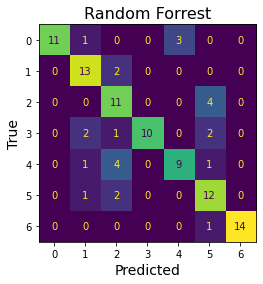

,weights,Precision,Recall_Sensitivity,Specificity,f1_score
0,14.3%,100.0%,73.3%,100.0%,84.6%
1,14.3%,72.2%,86.7%,94.4%,78.8%
2,14.3%,55.0%,73.3%,90.0%,62.9%
3,14.3%,100.0%,66.7%,100.0%,80.0%
4,14.3%,75.0%,60.0%,96.7%,66.7%
5,14.3%,60.0%,80.0%,91.1%,68.6%
6,14.3%,100.0%,93.3%,100.0%,96.6%
Simple Avg.,nan%,80.3%,76.2%,96.0%,76.9%
Weighted Avg.,nan%,80.3%,76.2%,96.0%,76.9%


In [ ]:
# Model 280x210
Balanced_Test_set = True 
Multi_to_binary = False

model = RF_Model  # {RF_Model,SVM_Model,GB_Model,MLP_Model,KNN_Model,Biased_Model}

if Balanced_Test_set:
    X = blc_data_arrays
    Y = blc_label_arrays
else:
    X = input_data_Array[2]
    Y = labels_Array[2]

Y_pred = model.predict(X)
if Multi_to_binary:
    Y_binary =  label_to_binary(Y)
    Y_pred_binary =  label_to_binary(Y_pred)
    results = model_evaluation(Y_binary,Y_pred_binary)
else:
    results = model_evaluation(Y,Y_pred,'Random Forrest')
results

# **Import CNN DataSets**

In [ ]:
file = 'Input_DataSet_280x210' 
input_data , labels = pickle.load(open(G_path + '/06_Rescaled_DataSet/'+ file,'rb'))
labels_biary = labels[1]
labels_multi = labels[0]

file = 'Input_DataSet_A_E' 
A_E_input_data , A_E_labels = pickle.load(open(G_path + '/05_AutoEncoded_DataSet/'+ file,'rb'))
A_E_labels_biary = A_E_labels[1]
A_E_labels_multi = A_E_labels[0]

file = 'Balanced_Test_Set_280x210' 
BLC_test_280x210 = pickle.load(open(G_path + '/06_Rescaled_DataSet/' + file,'rb'))

file = 'Balanced_Test_Set_A_E' 
BLC_test_A_E = pickle.load(open(G_path + '/05_AutoEncoded_DataSet/' + file,'rb'))

Meta_Data_Augmented = pickle.load(open( G_path + '/02_Augmented_MetaData/Meta_Data_Augmented','rb'))

In [ ]:
C_280 = 'CNN_280x210_MultiClassModel0_24_Jun22_22-38' # Best of grid search ['CNN_280x210_Model5_23_Jun22_12-55','CNN_280x210_Model4_22_Jun22_00-14]
C_280_binary = 'CNN_280x210_Binary_24_Jun22_22-17'

CNN_280x210_multi = pickle.load(open(G_path + '/08_Saved_Models_Outpus/Models/CNN_Grid_Search_Models/'+ C_280 , 'rb') ).eval()
CNN_280x210_binary = pickle.load(open(G_path + '/08_Saved_Models_Outpus/Models/CNN_Grid_Search_Models/'+ C_280_binary , 'rb') ).eval()

A_E = 'A_E_CNN_Model6_22_Jun22_00-29' #Best of grid search
A_E_binary = 'A_E_CNN_Model0_25_Jun22_09-35'

# [CNN_Nets.Net8_a, Model_Training_with_loader] = pickle.load(open(G_Models+'/Net8_Model_Trainin','rb'))
CNN_A_En_multiclass = pickle.load(open(G_path + '/08_Saved_Models_Outpus/Models/CNN_Grid_Search_Models/' + A_E , 'rb') ).eval()
CNNA_En_binary = pickle.load(open(G_path + '/08_Saved_Models_Outpus/Models/CNN_Grid_Search_Models/' + A_E_binary , 'rb') ).eval()

# **CNN Models Performance Evaluation**

Nr. of Data : 
 105
Accuracy of The Model : 
 0.6095238095238096


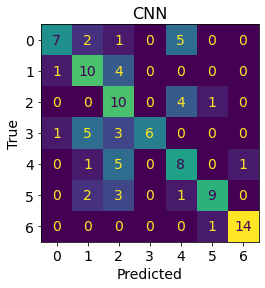

,weights,Precision,Recall_Sensitivity,Specificity,f1_score
0,14.3%,77.8%,46.7%,97.8%,58.3%
1,14.3%,50.0%,66.7%,88.9%,57.1%
2,14.3%,38.5%,66.7%,82.2%,48.8%
3,14.3%,100.0%,40.0%,100.0%,57.1%
4,14.3%,44.4%,53.3%,88.9%,48.5%
5,14.3%,81.8%,60.0%,97.8%,69.2%
6,14.3%,93.3%,93.3%,98.9%,93.3%
Simple Avg.,nan%,69.4%,61.0%,93.5%,61.8%
Weighted Avg.,nan%,69.4%,61.0%,93.5%,61.8%


In [ ]:
# Model 280x210
Balanced_Test_set = True 
Multi_to_binary = False

model = CNN_280x210_multi  # {CNN_280x210_multi, CNN_280x210_binary, CNN_A_En_multiclass, CNNA_En_binary}

if Balanced_Test_set:
    if model in [CNN_280x210_multi, CNN_280x210_binary]:
        X = BLC_test_280x210[0]
        Y = BLC_test_280x210[1]
    else:
        X = BLC_test_A_E[0]
        Y = BLC_test_A_E[1]       
else:
    if model in [CNN_280x210_multi, CNN_280x210_binary]:
        X = input_data[2]
        Y = labels_multi[2]
    else:
        X = A_E_input_data[0]
        Y = A_E_labels_multi[1]  

Y_pred = model.forward_noDrop(X).argmax(dim=1)
if Multi_to_binary:
    Y_binary =  label_to_binary(Y)
    Y_pred_binary =  label_to_binary(Y_pred)
    results = model_evaluation(Y_binary,Y_pred_binary)
else:
    results = model_evaluation(Y,Y_pred,'CNN')
results